# 3.6

## a

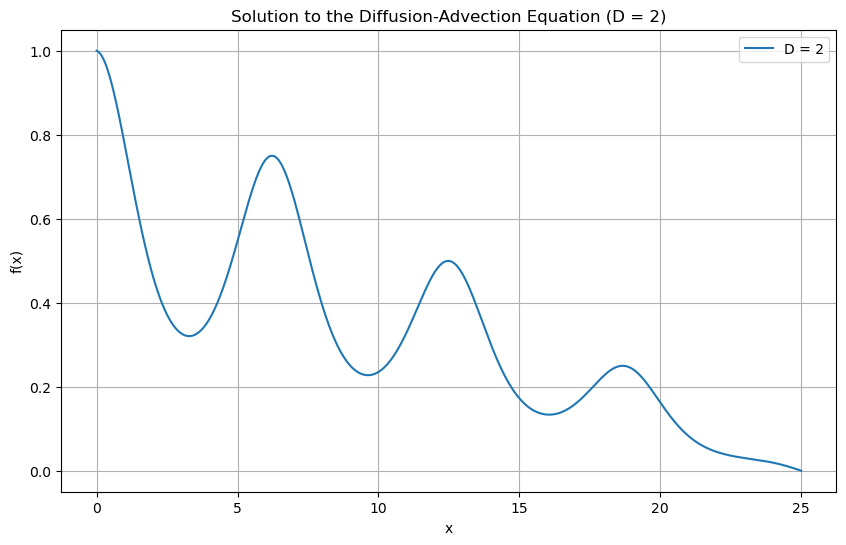

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Constants

def diffusion_advection(D):
    N = 1000
    L = 25
    dx = L / N 
    x = np.linspace(0, L, N)  

    # Velocity field
    v = -np.sin(x)   


    # diag(v(x))
    V = np.diag(v)
    A1 = np.zeros((N, N))

    # used: https://en.wikipedia.org/wiki/Finite_difference_coefficient 
    A1[0,0], A1[0,1], A1[0,2] = -3/2, 2, -1/2 # foward difference
    for i in range(1,N-1):
        A1[i,i-1], A1[i,i], A1[i,i+1] = -1/2, 0, 1/2 # central difference
    A1[N-1,N-3], A1[N-1,N-2], A1[N-1,N-1] = 1/2, -2, 3/2 # backward difference

    A1 = (1 / dx) * A1


    A2 = np.zeros((N, N))
    A2[0,0], A2[0,1], A2[0,2] = 1, -2, 1 # foward difference
    for i in range(1,N-1):
        A2[i,i-1], A2[i,i], A2[i,i+1] = 1, -2, 1 # central difference
    A2[N-1,N-3], A2[N-1,N-2], A2[N-1,N-1] = 1, -2, 1 # backward difference

    A2 = (D / dx**2) * A2
    
    # T1 = A1 * V
    T1 = A1 @ V
    
    b = np.zeros(N) # second boundary condition (f(25) = 0)
    b[0] = 1 # first boundary condition (f(0) = 1), 
    A = A2 - T1
    A[0,:] = 0
    A[0,0] = 1
    A[-1,:] = 0
    A[-1,-1] = 1

    f = np.linalg.solve(A,b)
    return x, f

D = 2
x, f = diffusion_advection(D)
# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x, f, label=f'D = {D}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Solution to the Diffusion-Advection Equation (D = 2)')
plt.legend()
plt.grid(True)
plt.show()


## b

## c

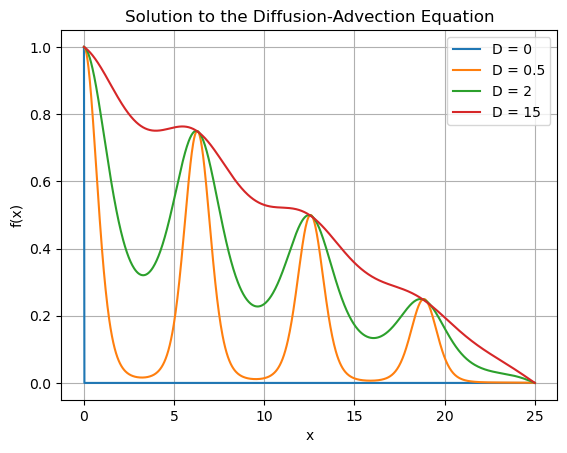

In [54]:
D_values = [0, 0.5, 2, 15]

for D in D_values:
    x, f = diffusion_advection(D)
    plt.plot(x, f, label=f'D = {D}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Solution to the Diffusion-Advection Equation')
    plt.legend()
    plt.grid(True)
plt.show()

# 4.1

## a 

In [87]:
def heat_equation(dt = 0.05, t_values = [0, 0.5, 1, 1.5, 2, 2.5, 3]):
    N = 1000 
    x = np.linspace(0, 1, N)
    dx = x[1] - x[0]
    t = 0 

    A1 = np.eye(N, N)

    A2 = np.zeros((N, N))
    A2[0,0], A2[0,1], A2[0,2] = 1, -2, 1 # foward difference
    for i in range(1,N-1):
        A2[i,i-1], A2[i,i], A2[i,i+1] = 1, -2, 1 # central difference
    A2[N-1,N-3], A2[N-1,N-2], A2[N-1,N-1] = 1, -2, 1 # backward difference

    A2 = (dt / dx**2) * A2
    
    A = A1 - A2
    A[0,:] = 0
    A[0,0] = 1
    A[-1,:] = 0
    A[-1,-1] = 3/2
    A[-1,-2] = -2 
    A[-1,-3] = 1/2


    f = np.exp(-5*x)
    b = f.copy()
    b[0] = 1
    b[-1] = 0
    while t <= 3:
        t = round(t, 2)
        f = np.linalg.solve(A,b)
        b = f.copy()
        b[0] = 1
        b[-1] = 0
        if t in t_values:
            plt.plot(x, f, label=f't = {t}')
        
        t += dt
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Solution to the Heat Equation')
    plt.legend()
    plt.grid(True)
    plt.show()

## b

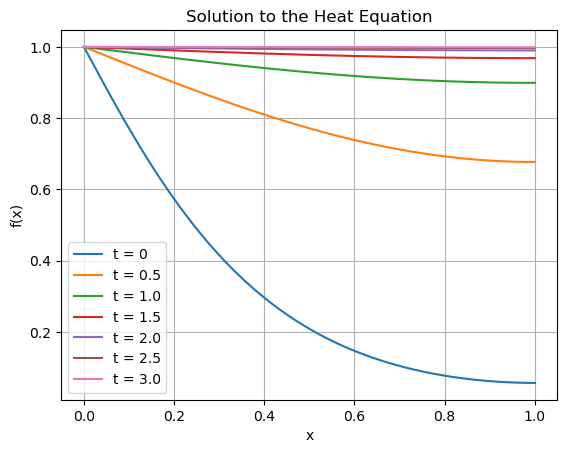

In [88]:
heat_equation(dt = 0.05, t_values = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

# 4.3

## a

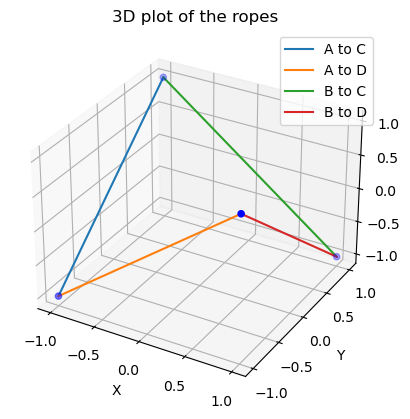

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Plot the four ropes in a 3D plot
A = np.array([-1, -1, -1])
B = np.array([1, 1, -1])
C = np.array([-1, 1, 1])
D = np.array([1, -1, 1])

# Plotting the ropes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([A[0], C[0]], [A[1], C[1]], [A[2], C[2]], label='A to C')
ax.plot([A[0], D[0]], [A[1], D[1]], [A[2], D[2]], label='A to D')
ax.plot([B[0], C[0]], [B[1], C[1]], [B[2], C[2]], label='B to C')
ax.plot([B[0], D[0]], [B[1], D[1]], [B[2], D[2]], label='B to D')
ax.legend()

ax.scatter([A[0], B[0], C[0], D[0]], [A[1], B[1], C[1], D[1]], [A[2], B[2], C[2], D[2]], color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D plot of the ropes')
plt.show()

## b

## c

## d

In [ ]:
def heat_equation(dt, t_values):
    N = 1000 
    x = np.linspace(0, 1, N)
    dx = x[1] - x[0]
    t = 0 

    A1 = np.eye(N, N)

    A2 = np.zeros((N, N))
    A2[0,0], A2[0,1], A2[0,2] = 1, -2, 1 # foward difference
    for i in range(1,N-1):
        A2[i,i-1], A2[i,i], A2[i,i+1] = 1, -2, 1 # central difference
    A2[N-1,N-3], A2[N-1,N-2], A2[N-1,N-1] = 1, -2, 1 # backward difference

    A2 = (dt / dx**2) * A2
    
    A = A1 - A2
    A[0,:] = 0
    A[0,0] = 1
    A[-1,:] = 0
    A[-1,-1] = 3/2
    A[-1,-2] = -2 
    A[-1,-3] = 1/2


    f = np.exp(-5*x)
    b = f.copy()
    b[0] = 1
    b[-1] = 0
    while t <= 3:
        f = np.linalg.solve(A,b)
        b = f.copy()
        b[0] = 1
        b[-1] = 0
        if t in t_values:
            plt.plot(x, b, label=f't = {t}')
        t = round(t, 3) + dt
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Solution to the Heat Equation')
    plt.legend()
    plt.grid(True)
    plt.show()